In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
file = files.upload()

Saving data_amazon.csv to data_amazon.csv


In [ ]:
df = pd.read_csv('data_amazon.csv')

In [ ]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Month
0,0,405-8078784-5731545,31-03-2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship,3
1,1,171-9198151-1101146,31-03-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship,3
2,2,404-0687676-7273146,31-03-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,Normal,3
3,3,403-9615377-8133951,31-03-2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship,3
4,4,407-1069790-7240320,31-03-2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073,IN,False,Normal,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128770,128970,406-6001380-7673107,29-06-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,517.00,HYDERABAD,TELANGANA,500013,IN,False,Normal,6
128771,128971,402-9551604-7544318,29-06-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,999.00,GURUGRAM,HARYANA,122004,IN,False,Normal,6
128772,128972,407-9547469-3152358,29-06-2022,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,690.00,HYDERABAD,TELANGANA,500049,IN,False,Normal,6
128773,128973,402-6184140-0545956,29-06-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,1199.00,Halol,Gujarat,389350,IN,False,Normal,6


# **EDA**

# Geographic EDA


In [ ]:
top_10_cities_amt = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)
top_10_cities_amt

,Amount
ship-city,
BENGALURU,7177797.94
HYDERABAD,5247415.06
MUMBAI,3859153.03
NEW DELHI,3843095.60
CHENNAI,3268672.30
PUNE,2465542.74
KOLKATA,1498238.57
GURUGRAM,1281164.52
THANE,1063475.67


In [ ]:
top_10_cities_amt_total_amount = df['Amount'].sum()
top_10_cities_amt_percentages = (top_10_cities_amt / top_10_cities_amt_total_amount) * 100

top_10_cities_amt_percentages

,Amount
ship-city,
BENGALURU,8.689711
HYDERABAD,6.352717
MUMBAI,4.672035
NEW DELHI,4.652595
CHENNAI,3.957177
PUNE,2.984878
KOLKATA,1.813824
GURUGRAM,1.551026
THANE,1.287483


In [ ]:
top_10_cities_units = df.groupby('ship-city')['Qty'].sum().sort_values(ascending=False).head(10)
top_10_cities_units

,Qty
ship-city,
BENGALURU,10401
HYDERABAD,7327
MUMBAI,5640
NEW DELHI,5241
CHENNAI,4937
PUNE,3532
KOLKATA,2163
GURUGRAM,1731
THANE,1538


In [ ]:
top_10_cities_units_total = df['Qty'].sum()
top_10_cities_units_percentages = (top_10_cities_units / top_10_cities_units_total) * 100

top_10_cities_units_percentages

,Qty
ship-city,
BENGALURU,8.930350
HYDERABAD,6.290998
MUMBAI,4.842532
NEW DELHI,4.499948
CHENNAI,4.238933
PUNE,3.032593
KOLKATA,1.857162
GURUGRAM,1.486245
THANE,1.320534


In [ ]:
# Calculate the percentage of each order status
order_status_counts = df['Status'].value_counts()
order_status_percentages = (order_status_counts / order_status_counts.sum()) * 100

order_status_percentages

,count
Status,
Shipped,60.335469
Shipped - Delivered to Buyer,22.293147
Cancelled,14.213939
Shipped - Returned to Seller,1.513493
Shipped - Picked Up,0.755581
Pending,0.510969
Pending - Waiting for Pick Up,0.218210
Shipped - Returning to Seller,0.112599
Shipped - Out for Delivery,0.027179


In [ ]:
# Calculate cancellation percentages by city
cancellation_counts = df[df['Status'] == 'Cancelled'].groupby('ship-city')['Status'].count()
total_orders_by_city = df.groupby('ship-city')['Status'].count()
cancellation_rates = (cancellation_counts / total_orders_by_city) * 100

# Find the cancellation rate for the top 10 cities by order count
top_10_cities = total_orders_by_city.sort_values(ascending=False).head(10).index
cancellation_rates_top_10 = cancellation_rates.loc[top_10_cities]

# Display results
print("Cancellation Rates for Top 10 Cities by Order Count:")
cancellation_rates_top_10

Cancellation Rates for Top 10 Cities by Order Count:


,Status
ship-city,
BENGALURU,11.679028
HYDERABAD,14.218421
MUMBAI,12.199509
NEW DELHI,13.399032
CHENNAI,13.613724
PUNE,12.940871
KOLKATA,12.825904
GURUGRAM,11.260054
THANE,14.058824


# Category EDA

In [ ]:
# Calculate the total sales for each category
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_sales

,Amount
Category,
T-shirt,41366082.55
Shirt,22436645.01
Blazzer,11672757.96
Trousers,5532582.04
Perfume,831850.10
Wallet,476183.55
Socks,155501.34
Shoes,128594.26
Watch,915.00


In [ ]:
# Calculate the percentage of total sales for each category
total_sales = df['Amount'].sum()
category_sales_percentage = (category_sales / total_sales) * 100

# Display the results
print("Sales Percentage by Category:")
category_sales_percentage

Sales Percentage by Category:


,Amount
Category,
T-shirt,50.079329
Shirt,27.162643
Blazzer,14.131478
Trousers,6.697951
Perfume,1.007069
Wallet,0.576486
Socks,0.188256
Shoes,0.155681
Watch,0.001108


In [ ]:
# Calculate the total units sold for each category
category_units_sold = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)

# Display the results
print("Total Units Sold by Category:")
category_units_sold

Total Units Sold by Category:


,Qty
Category,
T-shirt,45217
Shirt,44964
Blazzer,13933
Trousers,9887
Perfume,1051
Wallet,863
Socks,398
Shoes,152
Watch,3


In [ ]:
# Calculate the percentage of total units sold for each category
total_units_sold = df['Qty'].sum()
category_units_sold_percentage = (category_units_sold / total_units_sold) * 100

# Display the results
print("Units Sold Percentage by Category:")
category_units_sold_percentage

Units Sold Percentage by Category:


,Qty
Category,
T-shirt,38.823540
Shirt,38.606312
Blazzer,11.962943
Trousers,8.489027
Perfume,0.902394
Wallet,0.740976
Socks,0.341725
Shoes,0.130508
Watch,0.002576


In [ ]:
# Calculate cancellation percentages by category
cancellation_counts_category = df[df['Status'] == 'Cancelled'].groupby('Category')['Status'].count()
total_orders_by_category = df.groupby('Category')['Status'].count()
cancellation_percentages_category = (cancellation_counts_category / total_orders_by_category) * 100

# Display results
print("Cancellation Percentages by Category:")
cancellation_percentages_category.sort_values(ascending=False)

Cancellation Percentages by Category:


,Status
Category,
T-shirt,14.595574
Shirt,14.542241
Blazzer,13.688017
Socks,13.439636
Shoes,12.804878
Perfume,12.532411
Wallet,12.526998
Trousers,12.022631
Watch,NaN


In [ ]:
total_orders_by_category.sort_values(ascending=False)

,Status
Category,
T-shirt,50207
Shirt,49786
Blazzer,15488
Trousers,10605
Perfume,1157
Wallet,926
Socks,439
Shoes,164
Watch,3


# Time Series EDA

In [ ]:
# Group by month and calculate the sum of sales
monthly_sales = df.groupby('Month')['Amount'].sum()

# Filter for months 4, 5, and 6
monthly_sales = monthly_sales[[4, 5, 6]]

monthly_sales

,Amount
Month,
4,30342764.77
5,27549695.49
6,24602684.47


In [ ]:
# Calculate the total sales for months 4, 5, and 6
total_sales_456 = df[df['Month'].isin([4, 5, 6])]['Amount'].sum()

# Calculate sales for each month
sales_month_4 = df[df['Month'] == 4]['Amount'].sum()
sales_month_5 = df[df['Month'] == 5]['Amount'].sum()
sales_month_6 = df[df['Month'] == 6]['Amount'].sum()

# Calculate percentages
percentage_month_4 = (sales_month_4 / total_sales_456) * 100
percentage_month_5 = (sales_month_5 / total_sales_456) * 100
percentage_month_6 = (sales_month_6 / total_sales_456) * 100

# Print the results
print(f"Sales percentage for Month 4: {percentage_month_4:.2f}%")
print(f"Sales percentage for Month 5: {percentage_month_5:.2f}%")
print(f"Sales percentage for Month 6: {percentage_month_6:.2f}%")

Sales percentage for Month 4: 36.78%
Sales percentage for Month 5: 33.40%
Sales percentage for Month 6: 29.82%


In [ ]:
# Calculate the total number of orders for months 4, 5, and 6
orders_month_4 = df[df['Month'] == 4]['index'].count()
orders_month_5 = df[df['Month'] == 5]['index'].count()
orders_month_6 = df[df['Month'] == 6]['index'].count()

# Print the results
print(f"Total orders for Month 4: {orders_month_4}")
print(f"Total orders for Month 5: {orders_month_5}")
print(f"Total orders for Month 6: {orders_month_6}")

Total orders for Month 4: 48887
Total orders for Month 5: 42028
Total orders for Month 6: 37689


In [ ]:
# Calculate the number of cancelled orders for months 4, 5, and 6
cancelled_orders_month_4 = df[(df['Month'] == 4) & (df['Status'] == 'Cancelled')]['index'].count()
cancelled_orders_month_5 = df[(df['Month'] == 5) & (df['Status'] == 'Cancelled')]['index'].count()
cancelled_orders_month_6 = df[(df['Month'] == 6) & (df['Status'] == 'Cancelled')]['index'].count()

# Print the results
print(f"Cancelled orders for Month 4: {cancelled_orders_month_4}")
print(f"Cancelled orders for Month 5: {cancelled_orders_month_5}")
print(f"Cancelled orders for Month 6: {cancelled_orders_month_6}")

Cancelled orders for Month 4: 7103
Cancelled orders for Month 5: 5872
Cancelled orders for Month 6: 5312


In [ ]:
# Calculate cancellation percentages for months 4, 5, and 6
cancellations_month_4 = df[(df['Month'] == 4) & (df['Status'] == 'Cancelled')].shape[0]
cancellations_month_5 = df[(df['Month'] == 5) & (df['Status'] == 'Cancelled')].shape[0]
cancellations_month_6 = df[(df['Month'] == 6) & (df['Status'] == 'Cancelled')].shape[0]

total_month_4 = df[df['Month'] == 4].shape[0]
total_month_5 = df[df['Month'] == 5].shape[0]
total_month_6 = df[df['Month'] == 6].shape[0]

cancellation_percentage_4 = (cancellations_month_4 / total_month_4) * 100 if total_month_4 > 0 else 0
cancellation_percentage_5 = (cancellations_month_5 / total_month_5) * 100 if total_month_5 > 0 else 0
cancellation_percentage_6 = (cancellations_month_6 / total_month_6) * 100 if total_month_6 > 0 else 0

print(f"Cancellation percentage for Month 4: {cancellation_percentage_4:.2f}%")
print(f"Cancellation percentage for Month 5: {cancellation_percentage_5:.2f}%")
print(f"Cancellation percentage for Month 6: {cancellation_percentage_6:.2f}%")

Cancellation percentage for Month 4: 14.53%
Cancellation percentage for Month 5: 13.97%
Cancellation percentage for Month 6: 14.09%


In [ ]:
# Group data by month and category, then sum the 'Amount'
monthly_category_sales = df[df['Month'].isin([4, 5, 6])].groupby(['Month', 'Category'])['Amount'].sum().reset_index()

# Find the top-selling category for each month
top_categories = monthly_category_sales.loc[monthly_category_sales.groupby('Month')['Amount'].idxmax()]

top_categories

,Month,Category,Amount
5,4,T-shirt,16379369.40
13,5,T-shirt,13326247.21
21,6,T-shirt,11605498.94


In [ ]:

def top_shipped_city_by_month(df, months):
  top_cities = {}
  for month in months:
    # Filter data for the current month
    month_data = df[df['Month'] == month]

    # Group by city and sum quantities
    city_quantities = month_data.groupby('ship-city')['Qty'].sum()

    # Find the city with the highest quantity
    top_city = city_quantities.idxmax()
    top_cities[month] = top_city
  return top_cities

# Example usage for months 4, 5, and 6
top_cities_456 = top_shipped_city_by_month(df, [4, 5, 6])
top_cities_456

{4: 'BENGALURU', 5: 'BENGALURU', 6: 'BENGALURU'}

# Other EDA

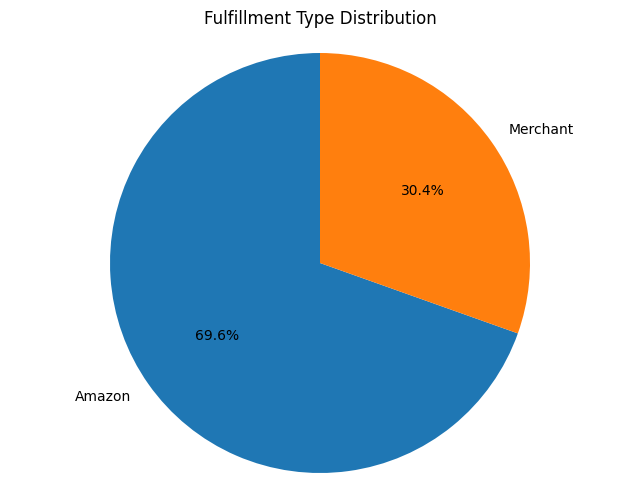

In [ ]:
# Assuming 'df' is your DataFrame as defined in the provided code.
fulfillment_counts = df['Fulfilment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(fulfillment_counts, labels=fulfillment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Fulfillment Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

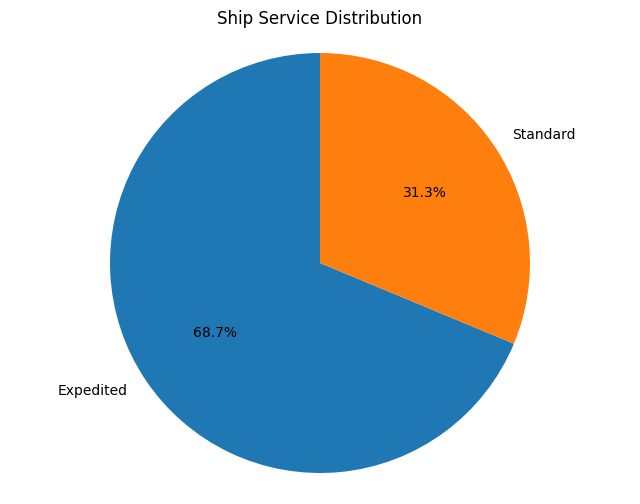

In [ ]:
ship_service_counts = df['ship-service-level'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(ship_service_counts, labels=ship_service_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Ship Service Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

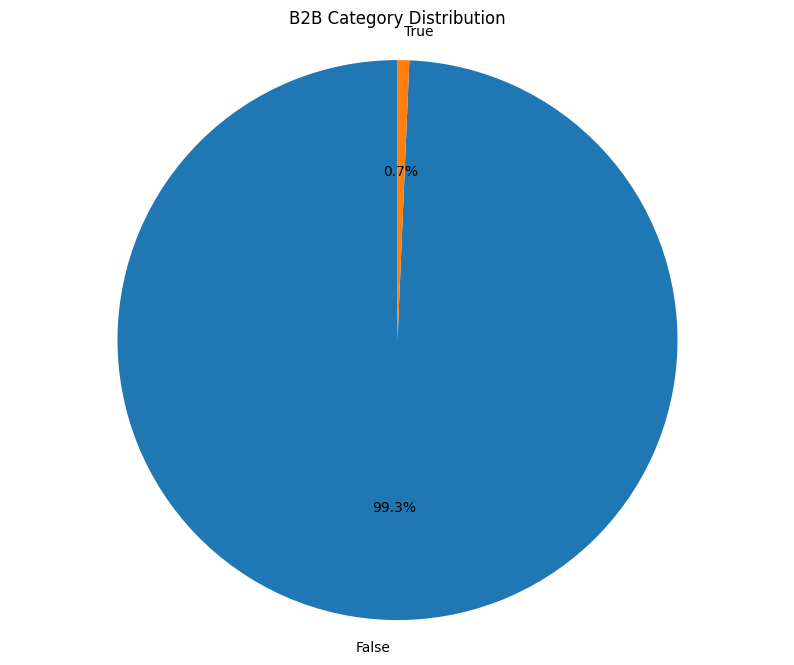

In [ ]:
# Calculate the value counts for the 'Category' column
category_counts = df['B2B'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('B2B Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

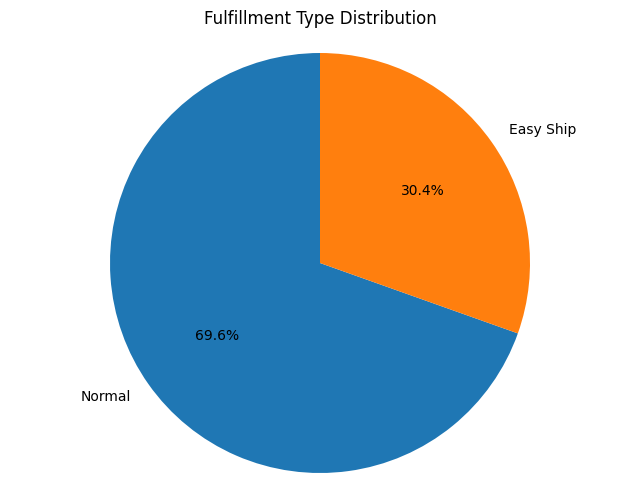

In [ ]:
fulfillment_counts = df['fulfilled-by'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(fulfillment_counts, labels=fulfillment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Fulfillment Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()